<a href="https://colab.research.google.com/github/MobinEzzati/AIChatBot/blob/main/StableDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install accelerate
!pip install diffusers transformers scipy ftfy
!pip install diffusers torch pillow moviepy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from diffusers import StableDiffusionPipeline
from transformers import pipeline
from transformers.utils import move_cache
from huggingface_hub import notebook_login
import torch
import accelerate
print(accelerate.__version__)

from IPython.display import display
from IPython.display import Video

import matplotlib.pyplot as plt
from PIL import Image
import os
from moviepy.editor import ImageSequenceClip, AudioFileClip, VideoFileClip




The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

0.30.1


In [3]:


notebook_login()
move_cache()


0it [00:00, ?it/s]

In [4]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True)
pipe = pipe.to(device)

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

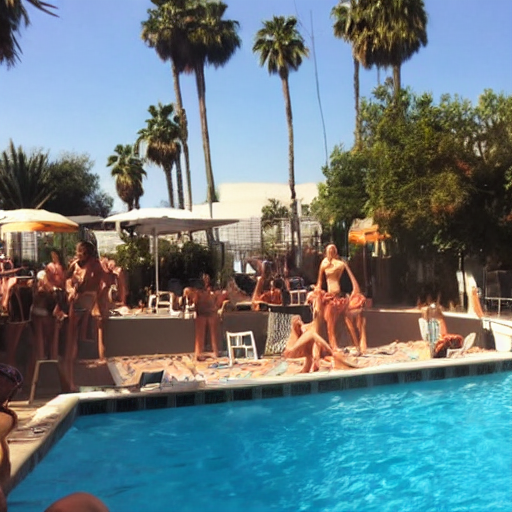

In [5]:
# Load the model once and use it multiple times


model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True).to(device)

def generate_image(prompt):
    image = pipe(prompt).images[0]
    display(image)

# Example usage
prompt = "pool party in LA"
generate_image(prompt)

## Create small video
we create multiple images that could be compile to the video. we Consider multiple prompt for this process. Finally we are going to combine all these images to the video.  

In [ ]:
def generate_video(prompts, pipe, output_dir= "movie_frames"):
    os.makedirs(output_dir, exist_ok=True)
    images = []
    for prompt in prompts:
        image = pipe(prompt).images[0]
        image_path = os.path.join(output_dir, f"{prompt}.png")
        image.save(image_path)
        images.append(image)
    return images


prompts = ["A futuristic cityscape at sunrise",
           "A futuristic cityscape in the morning", ]

images = generate_video(prompts, pipe)




def create_video(image_folder, output_video="output_movie.mp4", fps=2):
    image_files = [os.path.join(image_folder, img) for img in sorted(os.listdir(image_folder))]
    clip = ImageSequenceClip(image_files, fps=fps)
    clip.write_videofile(output_video)

# Create the video
create_video("movie_frames")

Video("output_movie.mp4", embed=True, width=600)


# def add_audio_to_video(video_path, audio_path, output_path="final_movie_with_audio.mp4"):
#     video_clip = VideoFileClip(video_path)
#     audio_clip = AudioFileClip(audio_path).subclip(0, video_clip.duration)
#     final_clip = video_clip.set_audio(audio_clip)
#     final_clip.write_videofile(output_path)

# audio_file = list(uploaded.keys())[0]  # Get the uploaded audio file name
# add_audio_to_video("output_movie.mp4", audio_file)

# create_video("movie_frames")

# # Display the video
# Video("output_movie.mp4", embed=True, width=600)



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Moviepy - Building video output_movie.mp4.
Moviepy - Writing video output_movie.mp4



Moviepy - Done !
Moviepy - video ready output_movie.mp4


NameError: name 'Video' is not defined